# Project
- I have choosed following health_care dataset for the project.  It is dataset of people who suffered from a stroke or not.
- Data variables are described as follows:
- ID : This column refers to patient ID
- Gender: Gender column tells the gender of patient whether male,female or other
- Age: age column tells the age of patient
- Hypertension: This column tells whether the patient had hypertension or not. 1 encodes to hypertension and 0 encodes to not.
- Heart Disease: This column denotes did the patient had heart_disease or not. 1 encodes that patient had heart disease and 0 encodes that patient did not had heart disease
- Ever Married: This column denotes did the patient was ever married or not. Yes denotes that he was married and no denotes that he never married.
- Work Type: This column tells the job type of patient whether he was doing private job, government job, self employed, children, and never worked.
- Residence: This column tells whether the patient was living in an urban area or rural area.
- Average Glucose: This column is a continous varibale that tell the average glucose level of patients.
- BMI: This column tells the bmi of patient.
- Smoking Status: This column tells whether the patient was a smoker, frequently smoked, never smoked and unknown
- Stroke: This column encodes whether the patient had a stroke or not. 1 means he suffered from a stroke and 0 means he did not. 

# 2.Data Preparation

In [2]:
# importing the libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
df = pd.read_csv("healthcare-dataset-stroke-data (1).csv")

In [4]:
# exploring the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# getting infor about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# getting basic statistics for the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# checking for null values in the dataset
df.isna().sum()

# it looks bmi column has some null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# imputing bmi column NAN values with the median of column
bmi_median = df["bmi"].median()
df["bmi"].fillna(bmi_median,inplace=True)

# checking if still NaN values are present
df.isna().sum()



id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# converting hypertension,heart_disease and stroke column to object type as they are categorical
df["hypertension"] = df["hypertension"].astype("object")
df["heart_disease"] = df["heart_disease"].astype("object")
df["stroke"] = df["stroke"].astype("object")

In [10]:
# making a list to separate numerical and categorical column
object_cols = [col for col in df.columns if df[col].dtype == "object"]
numerical_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

# this is a list containing true numeric columns 
num_cols = ["age","avg_glucose_level","bmi"]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


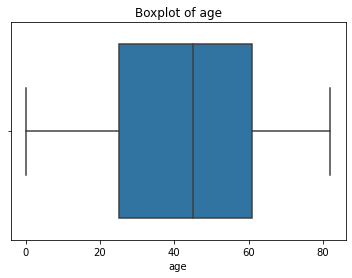

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


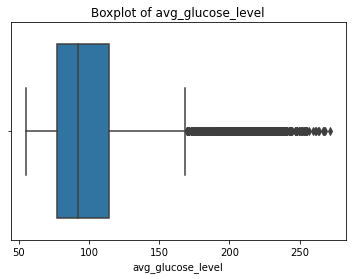

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


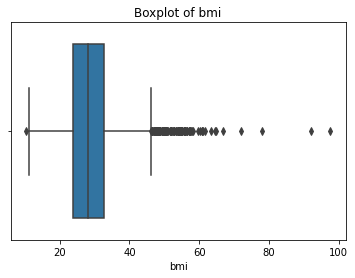

In [11]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title("Boxplot of {}".format(col))
    plt.show()

### From the boxplot it looks age column does not have outliers, avg_glucose level and bmi columns have outliers

In [12]:
# detecting how many data points in those two columns are outliers
print("Number of Outliers in the avg_glucose_level column {}".format(len(df[df["avg_glucose_level"] > 170])))

print("Number of Outliers in the bmi column {}".format(len(df[df["bmi"] > 45])))

Number of Outliers in the avg_glucose_level column 622
Number of Outliers in the bmi column 155


In [13]:
# now replacing the outliers with the median of the columns
# converting the outliers in the form of NaN values
df.loc[df["avg_glucose_level"] > 170,"avg_glucose_level"] = np.nan
df.loc[df["bmi"] > 45,"bmi"] = np.nan

In [14]:
# checking if the outliers have been succesfully replaced by Nan values
print(df["avg_glucose_level"].isna().sum()) 
print(df["bmi"].isna().sum())

622
155


In [15]:
# now imputing Nan values with the median of the columns
avg_glucose_median = df["avg_glucose_level"].median()
bmi_median = df["bmi"].median()

# replacing NaN with median
df["avg_glucose_level"].replace(np.nan,avg_glucose_median,inplace=True)
df["bmi"].replace(np.nan,bmi_median,inplace=True)

# Exploratory Data Analysis

### Univariate Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


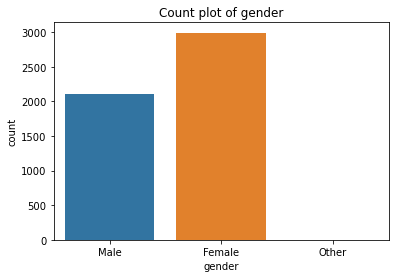

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


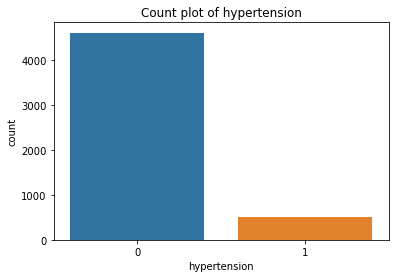

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


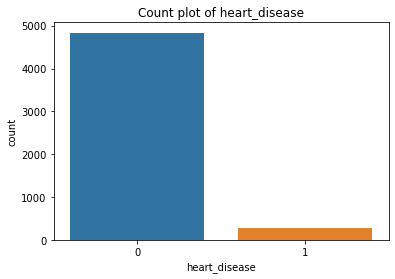

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


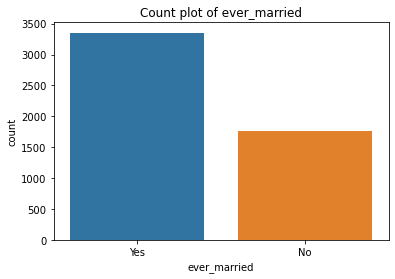

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


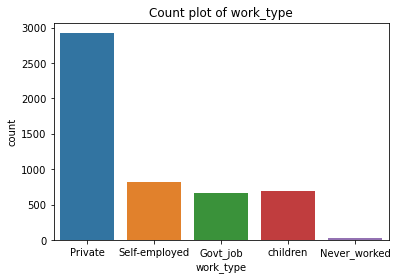

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


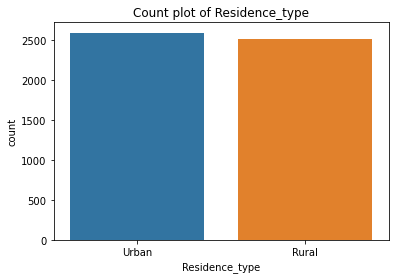

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


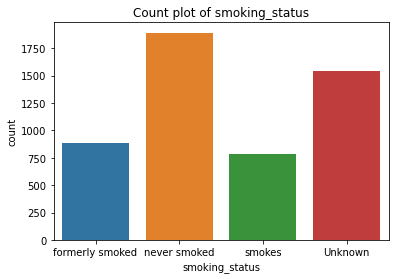

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


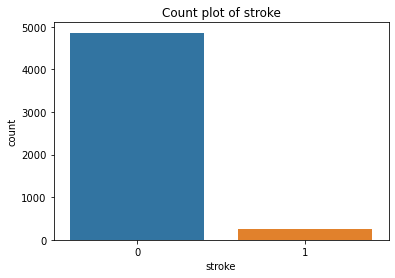

In [16]:
for col in object_cols:
    sns.countplot(df[col])
    plt.title("Count plot of {}".format(col))
    plt.show()

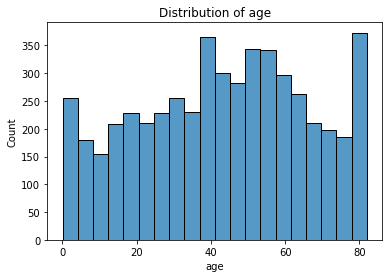

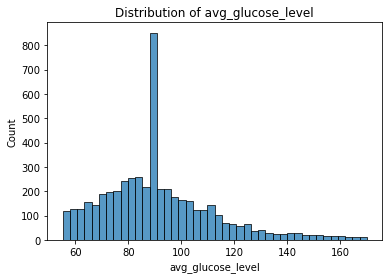

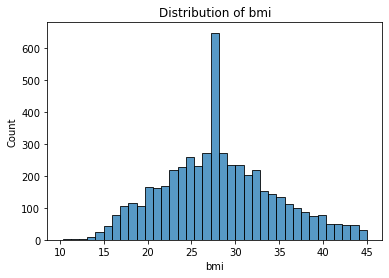

In [17]:
# Seeing distribution of numerical columns
for col in num_cols:
    sns.histplot(df[col])
    plt.title("Distribution of {}".format(col))
    plt.show()

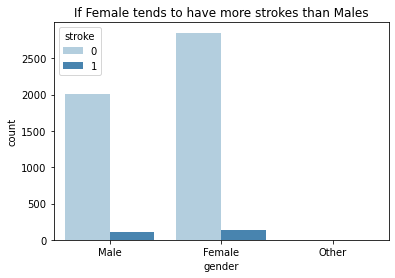

In [18]:
#If Female tends to have more strokes than Males
sns.countplot(x="gender",hue="stroke",data=df,palette="Blues")
plt.title("If Female tends to have more strokes than Males")
plt.show()

<AxesSubplot:ylabel='gender,stroke'>

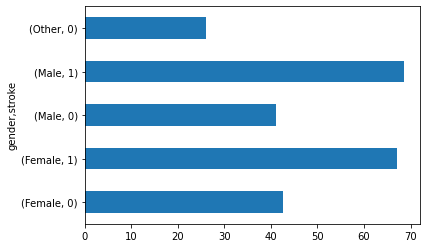

In [19]:
# checking do older people are more likely to suffer from stroke
df.groupby(["gender","stroke"])["age"].mean().plot(kind="barh")

# from the graph it is evident that older people are more likely to suffer from stroke

In [20]:
# making dataset stroke to extract insights about people who had strokes
stroke = df[df["stroke"] == 1]
stroke.shape

(249, 12)

<AxesSubplot:xlabel='gender'>

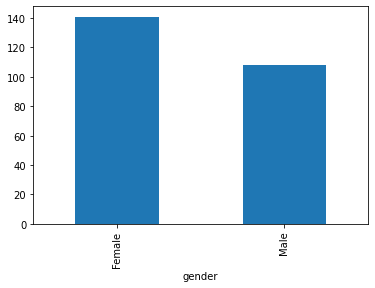

In [21]:
#If Female tends to have more strokes than Male
stroke.groupby("gender")["stroke"].count().plot(kind="bar")

# so from over data females tend to have more strokes thana man

Text(0.5, 1.0, 'Average age of Male and Femal who had a stroke')

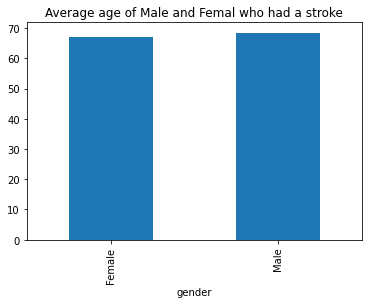

In [22]:
# Average age of Male and Female who had stroke
stroke.groupby(["gender"])["age"].mean().plot(kind="bar")
plt.title("Average age of Male and Femal who had a stroke")

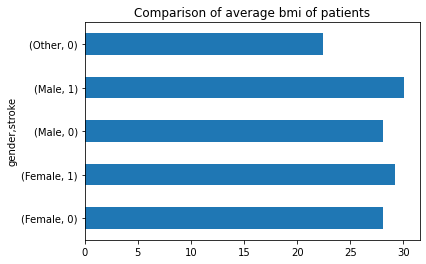

In [23]:
# average BMI of people who suffered from stroke
df.groupby(["gender","stroke"])["bmi"].mean().plot(kind="barh")
plt.title("Comparison of average bmi of patients")
plt.show()


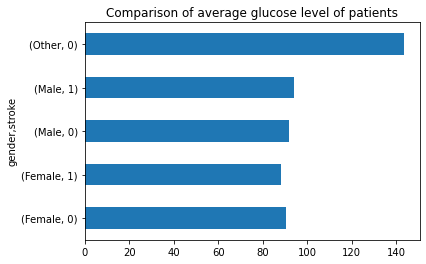

In [24]:
# average glucose level of people who suffered from stroke and those who didn't
df.groupby(["gender","stroke"])["avg_glucose_level"].mean().plot(kind="barh")
plt.title("Comparison of average glucose level of patients")
plt.show()

# The graph is showing that those people who suffered from a stroke had high glucose levels as compared to those people who didn't

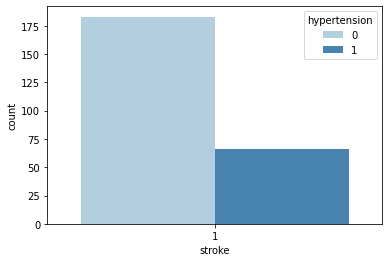

In [25]:
# Do patients more likely to suffer from stroke if they have hypertension?
sns.countplot(x="stroke",hue="hypertension",data=stroke,palette="Blues")
plt.title("")
plt.show()

# The graph is showing that there is less proportion of people who had a hypertension and had a stroke

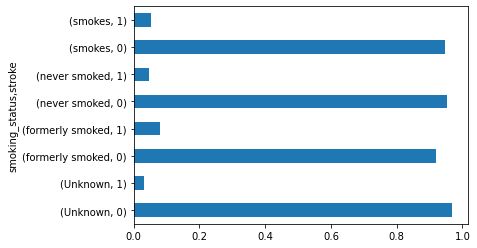

In [26]:
# Comparison among people who smoked or not and had a stroke or not
df.groupby(["smoking_status"])["stroke"].value_counts(normalize=True).plot(kind="barh")
plt.show()

# The graph shows that smoking is not likely to have any impact on stroke.

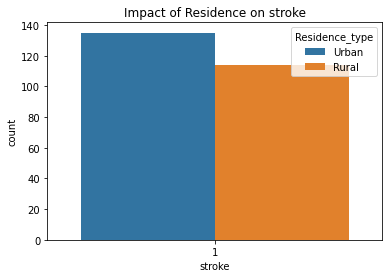

In [27]:
# proportion of urban and rural people who suffered from stroke
sns.countplot(x="stroke",hue="Residence_type",data=stroke)
plt.title("Impact of Residence on stroke")
plt.show()

# The graph shows that people who lived in urban areas had more strokes than people who lived in rural areas. 

# Bivariate Analysis

In [28]:
df["gender"]

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

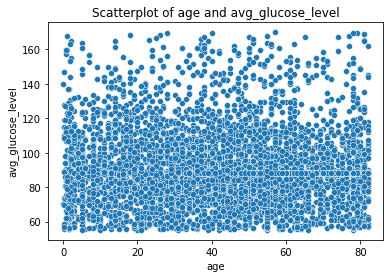

In [29]:
# drawing scatter plot to see if any correlation exist among variables
sns.scatterplot(x="age",y="avg_glucose_level",data=df)
plt.title("Scatterplot of age and avg_glucose_level")
plt.show()

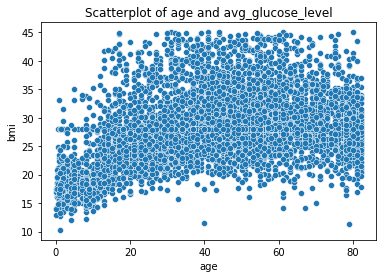

In [30]:
# drawing scatter plot to see if any correlation exist among variables
sns.scatterplot(x="age",y="bmi",data=df)
plt.title("Scatterplot of age and avg_glucose_level")
plt.show()

# As data is very big I am going to correlation function to see if any correlation exist bewtween variables

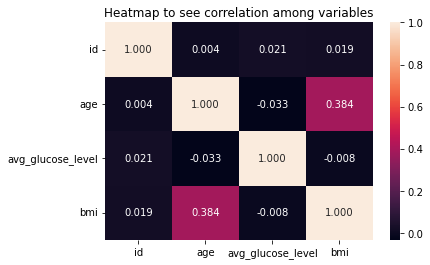

In [31]:
# calculating correlation
corr = df.corr()

# making a  heat map of the correlations
sns.heatmap(corr,annot=True,fmt=".3f")
plt.title("Heatmap to see correlation among variables")
plt.show()


### So from the heatmap it is evident that age and bmi has some correlation (not a strong one), so older people tend to have greater bmis.

# 3. Model Planning
- Using the stroke dataset we can build classification, regression and clustering models.
- We will use stroke variable for classification problem, bmi variable for regression problem.

# 4. Model Building

# Machine Learning
- In machine learning I will develop 3 models which are classisfication models, regression model and clustering model.


# Classification Model
- So, let's start with classification model first.
- In classification or supervised machine learning our target will be to predict stroke by inputting the feature variables getting the prediction whether the patient will suffer from stroke or not.
- I will use Decision Tree, Random Forest and Naive Bayes for classification.

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,87.99,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,87.99,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,87.99,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,87.99,24.0,never smoked,1


In [33]:
# preparing data
# replacing categories in gender column Female, Male and Other with 0,1 and 2
df["gender"] = df["gender"].replace("Female",0)
df["gender"] = df["gender"].replace("Male",1)
df["gender"] = df["gender"].replace("Other",2)

In [34]:
df["ever_married"] = df["ever_married"].replace("No",0)
df["ever_married"] = df["ever_married"].replace("Yes",1)

In [35]:
df["work_type"] = df["work_type"].replace("Private",0)
df["work_type"] = df["work_type"].replace('Self-employed',1)
df["work_type"] = df["work_type"].replace("Govt_job",2)
df["work_type"] = df["work_type"].replace("children",3)
df["work_type"] = df["work_type"].replace("Never_worked",4)

In [36]:
df["Residence_type"] = df["Residence_type"].replace("Rural",0)
df["Residence_type"] = df["Residence_type"].replace("Urban",1)

In [37]:
df["smoking_status"] = df["smoking_status"].replace('Unknown',0)
df["smoking_status"] = df["smoking_status"].replace('never smoked',1)
df["smoking_status"] = df["smoking_status"].replace('formerly smoked',2)
df["smoking_status"] = df["smoking_status"].replace('smokes',3)

In [38]:
# changing data types of variables
df["hypertension"] = df["hypertension"].astype("int64")
df["heart_disease"] = df["heart_disease"].astype("int64")
df["stroke"] = df["stroke"].astype("int64")

In [39]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [40]:
# from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
# X = df.copy()
# X.drop("stroke",axis=1,inplace=True)
# X = OrdinalEncoder().fit_transform(X)

In [41]:
# Splitting data into features and target variable
X = df.copy()
y = df["stroke"].values

In [42]:
# dropping ID column and target column stroke from X
X.drop(["id","stroke"],axis=1,inplace=True)

In [43]:
# Scaling the feature variables using standard scaling
from sklearn.preprocessing import StandardScaler
transform_X = StandardScaler().fit_transform(X)


In [44]:
# splitting data into training and test set
# importing train test split
from sklearn.model_selection import train_test_split

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(transform_X,y,test_size=0.2,random_state=21,stratify=y)

In [45]:
# Decison tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn import Random

In [46]:
# training the decision tree model
dtm = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtm.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
# prediction using dtm
dtm_y_pred = dtm.predict(X_test)
dtm_score = accuracy_score(y_test,dtm_y_pred)
print(dtm_score)

0.9129158512720157


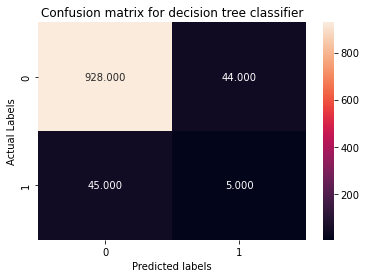

In [48]:
# confusion matrix for dtc
cm = confusion_matrix(y_test,dtm_y_pred)
sns.heatmap(cm,annot=True,fmt=".3f")
plt.title("Confusion matrix for decision tree classifier")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted labels")
plt.show()


In [49]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# training model
rfc = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)
rfc.fit(X_train,y_train)

# prediction
rfc_y_pred = rfc.predict(X_test)

# calculating accuracy score
rfc_score = accuracy_score(y_test,rfc_y_pred)
rfc_score

0.9452054794520548

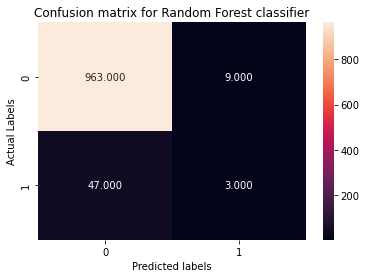

In [50]:
# confusion matrix for dtc
cm = confusion_matrix(y_test,rfc_y_pred)
sns.heatmap(cm,annot=True,fmt=".3f")
plt.title("Confusion matrix for Random Forest classifier")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted labels")
plt.show()


In [51]:
# importing naive bayes classifier
from sklearn.naive_bayes import CategoricalNB 

# splitting data for naive bayes as it does not take negative values
X_train_nb,X_test_nb,y_train_nb,y_test_nb = train_test_split(X,y,test_size=0.2,random_state=22,stratify=y)

# model training
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(X_train_nb,y_train_nb)

# prediciton
nb_y_pred = NBClf.predict(X_test_nb)

# score
nb_score = accuracy_score(y_test_nb,nb_y_pred)
nb_score

0.901174168297456

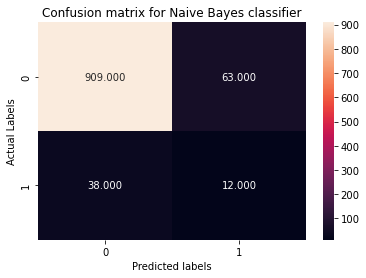

In [52]:
# confusion matrix for dtc
cm = confusion_matrix(y_test_nb,nb_y_pred)
sns.heatmap(cm,annot=True,fmt=".3f")
plt.title("Confusion matrix for Naive Bayes classifier")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted labels")
plt.show()


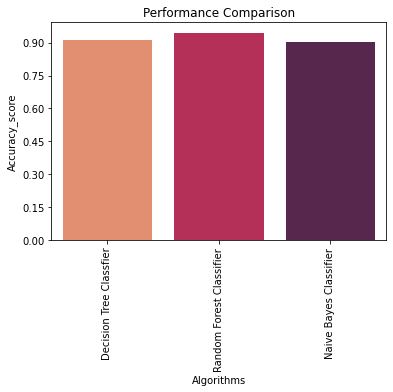

In [53]:
# Comparison among all
report = pd.DataFrame({"Algorithms":["Decision Tree Classfier","Random Forest Classifier","Naive Bayes Classifier"],"Accuracy_score":[dtm_score,rfc_score,nb_score]})

# making a barplot for comparison
sns.barplot(x="Algorithms",y="Accuracy_score",data=report,palette="rocket_r")
plt.yticks([0,0.15,0.30,0.45,0.60,0.75,0.90])
plt.xticks(rotation=90)
plt.title("Performance Comparison")
plt.show()

## Among all the classifiers Random Forest Classifier performed the best.